# Overview

Heart disease is very dangerous for people of any age. Lot's of people are dying every year due to heart diseases. If someone with heart disease follow proper rules and ragulation he might live ok. So the important part is to determine if someone has heart disease or not. In this notebook we are going to do exactly this.

### Steps
    1. Understanding the problem
    2. EDA
    3. Data preprocessing
    4. Modeling
    5. Evaluation
    
# Understanding the problem

A dataset was given which has 14 columns containing different information about a person. We need to predict the `target` column using other 13 columns. This is a supervised classification problem.

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the dataset
df = pd.read_csv('../input/heart-disease-dataset/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.shape

(1025, 14)

In [6]:
#concise summary of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#Generating descriptive statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# EDA

`Let's find how many people have heart disease and how many people doesn't have heart disease?`

In [8]:
#finging the values
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

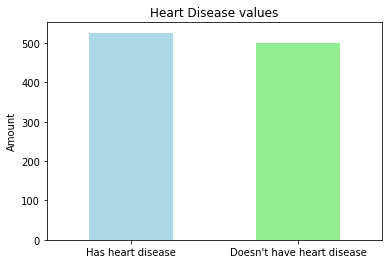

In [9]:
#plotting bar chart.
fig = df.target.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen'])
fig.set_xticklabels(labels=['Has heart disease', "Doesn't have heart disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Amount");

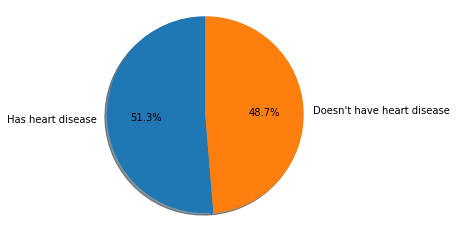

In [10]:
#visualizing in Pie chart
labels = "Has heart disease", "Doesn't have heart disease"
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(df.target.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Now let's check how many `Male` and `Female` are in the dataset

In [11]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

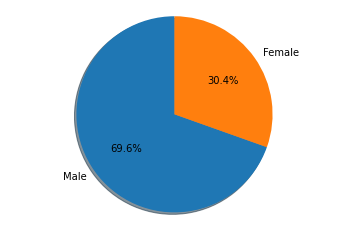

In [12]:
#visualizing in Pie chart
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(df.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

`Let's find People of which sex has most heart disease?`

In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


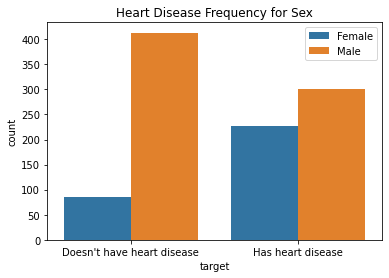

In [14]:
fig = sns.countplot(x = 'target', data = df, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

`Let's find people of which sex has which type of chest pain most?`

In [15]:
#counting values for different chest pain
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

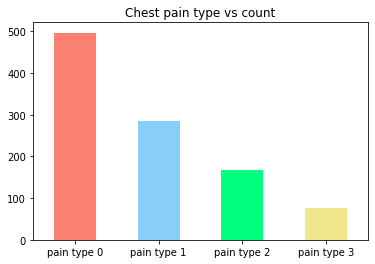

In [16]:
#plotting a bar chart
fig = df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

plt.title('Chest pain type vs count');

In [17]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


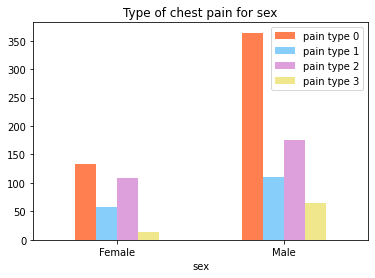

In [18]:
fig = pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

`Now let's find people with which chest pain are most pron to have heart disease?`

In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


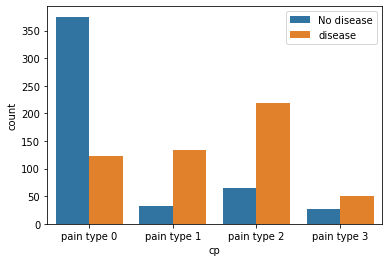

In [20]:
fig = sns.countplot(x = 'cp', data = df, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

Now let's take look at our age column.

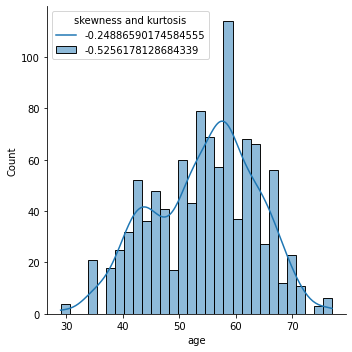

In [21]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = df, bins = 30, kde = True)
skewness=str(df["age"].skew())
kurtosis=str(df["age"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

Let's plot another distribution plot for `Maximum heart rate`

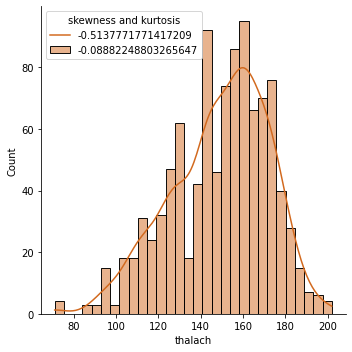

In [22]:
sns.displot(x = 'thalach', data = df, bins = 30, kde = True, color = 'chocolate')
skewness=str(df["thalach"].skew())
kurtosis=str(df["thalach"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

`Now let's observe Age vs Maximum heart rate when people have heart disease.`

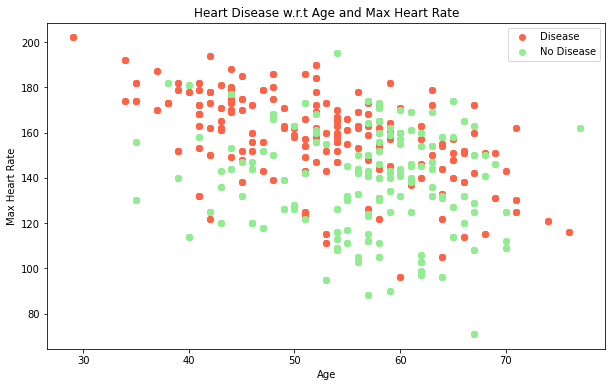

In [23]:
# Creating a figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="tomato")

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightgreen")

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

Let's make a density curve for visualizing the distribution of `age` and `thalach`(Maximum Heart Rate) observations in our dataset. 

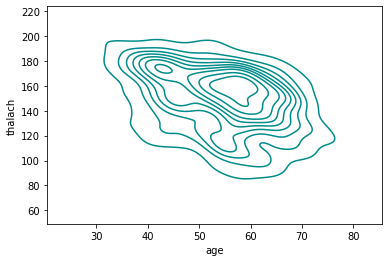

In [24]:
sns.kdeplot(x = 'age', y = 'thalach', data = df, color = 'darkcyan');

Let's see a distribution plot for `number of people with heart disease` vs `max heart rate`

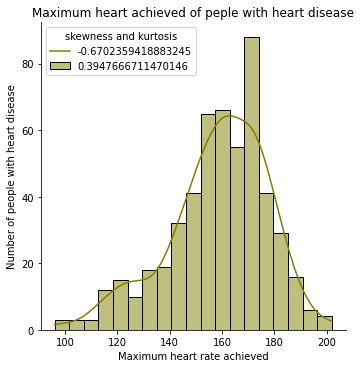

In [25]:
sns.displot(x = df.thalach[df.target==1], data = df, kde = True, color= 'olive')
skewness=str(df.thalach[df.target==1].skew())
kurtosis=str(df.thalach[df.target==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of peple with heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people with heart disease");

Distribution plot for `number of people without heart disease` vs `max heart rate`

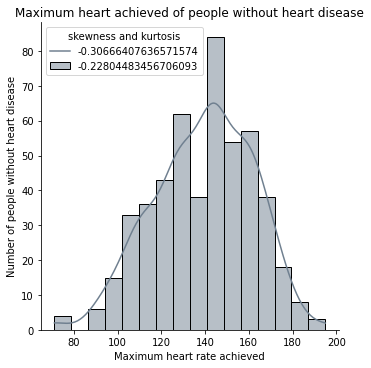

In [26]:
sns.displot(x = df.thalach[df.target==0], data = df, kde = True, color= 'slategray')
skewness=str(df.thalach[df.target==0].skew())
kurtosis=str(df.thalach[df.target==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease");

`Now let's observe Age vs Serum Cholestoral when people have heart disease.`

Now, let's make a distribution plot for serum cholestoral

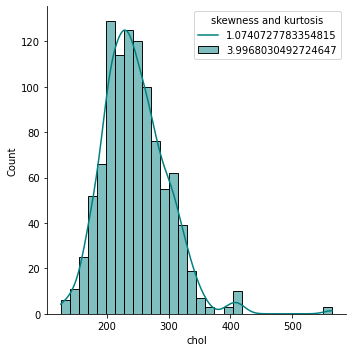

In [27]:
sns.displot(x = 'chol', data = df, bins = 30, kde = True, color = 'teal')
skewness=str(df['chol'].skew())
kurtosis=str(df['chol'].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));

Now let's plot another scatter plot for Age vs serum cholestoral

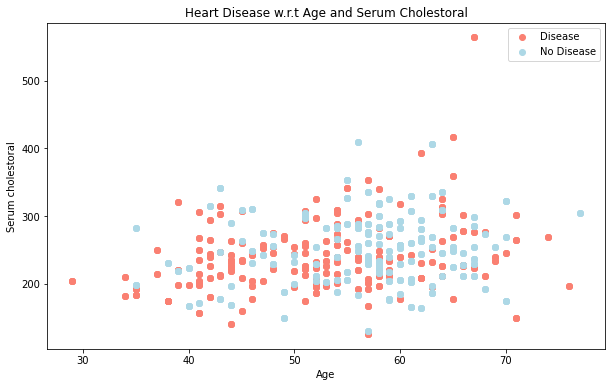

In [28]:
# Creating another figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.chol[df.target==1], 
            c="salmon") # define it as a scatter figure

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.chol[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease w.r.t Age and Serum Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum cholestoral");

Let's make a density curve for visualizing the distribution of `age` and `chol` observations in our dataset. 

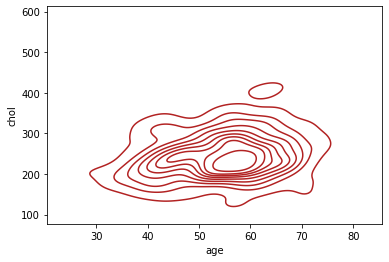

In [29]:
sns.kdeplot(x = 'age', y = 'chol', data = df, color = 'firebrick');

Distribution plot for `number of people with heart disease` vs `Serum Cholestoral`

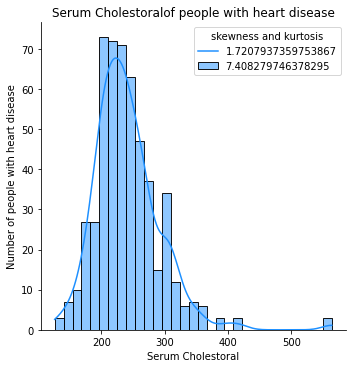

In [30]:
sns.displot(x = df.chol[df.target==1], data = df, kde = True, color= 'dodgerblue')
skewness=str(df.chol[df.target==1].skew())
kurtosis=str(df.chol[df.target==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));
plt.title("Serum Cholestoralof people with heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people with heart disease");

Distribution plot for `number of people without heart disease` vs `Serum Cholestoral`

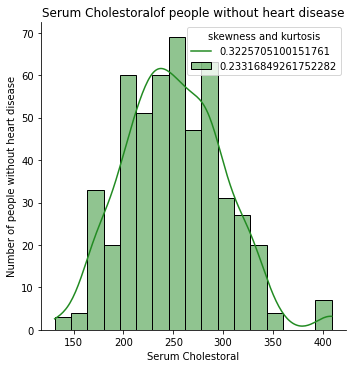

In [31]:
sns.displot(x = df.chol[df.target==0], data = df, kde = True, color= 'forestgreen')
skewness=str(df.chol[df.target==0].skew())
kurtosis=str(df.chol[df.target==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));
plt.title("Serum Cholestoralof people without heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people without heart disease");

`Now let's find People of which sex has more exercise induced angina?`

In [32]:
pd.crosstab(df.exang, df.sex)

sex,0,1
exang,,
0,238,442
1,74,271


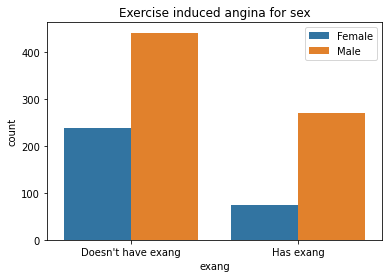

In [33]:
fig = sns.countplot(x = 'exang', data = df, hue = 'sex')
plt.title('Exercise induced angina for sex')
fig.set_xticklabels(labels=["Doesn't have exang", 'Has exang'], rotation=0)
plt.legend(['Female', 'Male']);

`Which sex of people has more fasting blood sugar > 120 mg/dl?`

In [34]:
df.fbs.value_counts()

0    872
1    153
Name: fbs, dtype: int64

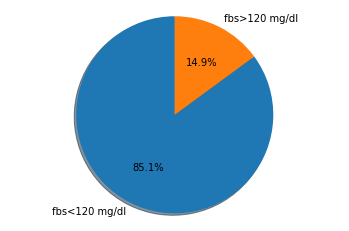

In [35]:
#visualizing in Pie chart
labels = 'fbs<120 mg/dl', 'fbs>120 mg/dl'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(df.fbs.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [36]:
pd.crosstab(df.sex, df.fbs)

fbs,0,1
sex,,
0,270,42
1,602,111


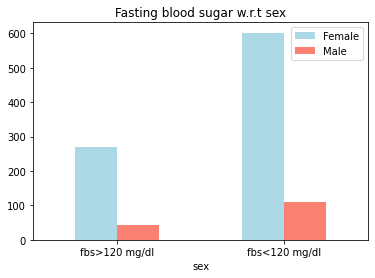

In [37]:
fig = pd.crosstab(df.sex, df.fbs).plot(kind = 'bar', color = ['lightblue', 'salmon'])
plt.title("Fasting blood sugar w.r.t sex")
fig.set_xticklabels(labels=['fbs>120 mg/dl', 'fbs<120 mg/dl'], rotation=0)
plt.legend(['Female', 'Male']);

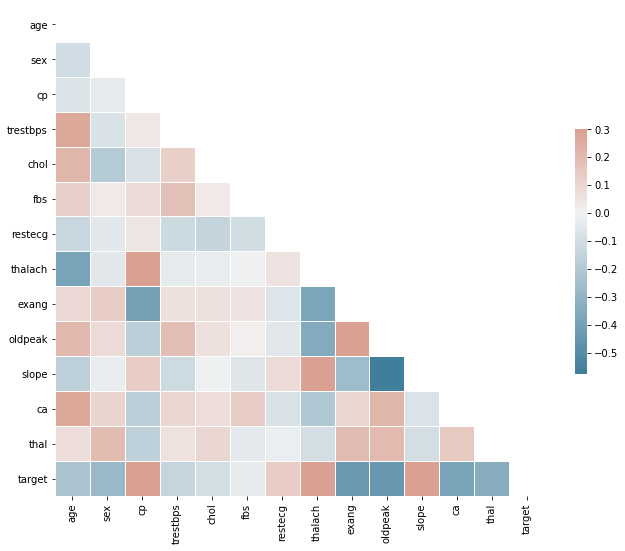

In [38]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Data Preprocessing

In [39]:
#checking for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no null values.

# Modeling

In [40]:
# creating dependent and independent matrix of features
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [41]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [42]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [43]:
# spltting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 31)

In [44]:
len(x_train), len(x_test), len(y_train), len(y_test)

(820, 205, 820, 205)

In [45]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
999,67,1,0,125,254,1,1,163,0,0.2,1,2,3
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2
605,71,0,2,110,265,1,0,130,0,0.0,2,1,2
172,56,1,1,120,240,0,1,169,0,0.0,0,0,2
385,51,1,2,110,175,0,1,123,0,0.6,2,0,2


In [46]:
y_train.head()

999    0
208    1
605    1
172    1
385    1
Name: target, dtype: int64

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 4)
log_clf.fit(x_train, y_train)
log_score = log_clf.score(x_test, y_test)
log_score

0.8585365853658536

### Tuning Logistic Regression

In [48]:
from sklearn.model_selection import GridSearchCV
log_grid = {'C': np.logspace(-5, 5),
            'solver': ['liblinear'],
            'max_iter': np.arange(1000, 2000, 100),
            'penalty':['l1', 'l2']
           }

log_gscv = GridSearchCV(LogisticRegression(random_state = 7),
                          param_grid=log_grid,
                          cv=5,
                          verbose=True)

log_gscv.fit(x_train, y_train)
log_tuned_score = log_gscv.score(x_test, y_test)
log_tuned_score

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


0.8682926829268293

In [49]:
log_gscv.best_params_

{'C': 0.04714866363457394,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

### KNeighbors Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
knn_score = knn_clf.score(x_test, y_test)
knn_score

0.7560975609756098

### Tuning KNeighbors Classifier

In [51]:
knn_grid = {'n_neighbors': np.arange(2, 15),
            'leaf_size': [10, 15, 20, 25, 30, 35, 40, 45, 50],
            'p':[1,2,3,4,5], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree']}

knn_gscv = GridSearchCV(KNeighborsClassifier(),
                        param_grid=knn_grid,
                        cv=5,
                        verbose=True)

knn_gscv.fit(x_train, y_train)
knn_tuned_score = knn_gscv.score(x_test, y_test)
knn_tuned_score

Fitting 5 folds for each of 1755 candidates, totalling 8775 fits


0.9414634146341463

In [52]:
knn_gscv.best_params_

{'algorithm': 'auto', 'leaf_size': 45, 'n_neighbors': 2, 'p': 1}

### Support Vector Classifier

In [53]:
from sklearn import svm
svc_clf = svm.SVC(random_state = 7)
svc_clf.fit(x_train, y_train)
svc_score = svc_clf.score(x_test, y_test)
svc_score

0.7560975609756098

### Tuning Support Vector Classifier

In [54]:
svc_grid = {'C': np.logspace(-5, 5, 20),
            'kernel': ['rbf'],
            'degree': [2,3,4]
           }

svc_gscv = GridSearchCV(svm.SVC(random_state = 31),
                        param_grid=svc_grid,
                        cv=5,
                        verbose=True)

svc_gscv.fit(x_train, y_train)
svc_tuned_score = log_gscv.score(x_test, y_test)
svc_tuned_score

Fitting 5 folds for each of 60 candidates, totalling 300 fits


0.8682926829268293

In [55]:
svc_gscv.best_params_

{'C': 100000.0, 'degree': 2, 'kernel': 'rbf'}

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(n_estimators=1000, random_state = 35)
rand_clf.fit(x_train, y_train)
ranf_score = rand_clf.score(x_test, y_test)
ranf_score

1.0

**oh boy!!**

100% acuuracy!! It is surely overfitting. 

### GradientBoostingClassifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_score = gbc.score(x_test, y_test)
gbc_score

0.9463414634146341

### Tuning GradientBoostingClassifier

In [58]:
gbc_grid = {'loss': ['deviance', 'exponential'],
            'learning_rate': [0.1,0.01],
            'n_estimators': [100, 200, 500, 1000],
            'min_samples_split': [2, 4, 6, 8, 10],
            'min_samples_leaf': [1, 2, 3, 5],
            'max_depth': [1, 2, 3]}


gbc_gscv = GridSearchCV(GradientBoostingClassifier(),
                      param_grid = gbc_grid,
                           cv=5,
                           verbose=True)
gbc_gscv.fit(x_train, y_train)
gbc_tuned_score = gbc_gscv.score(x_test, y_test)
gbc_tuned_score

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


0.9853658536585366

In [59]:
gbc_gscv.best_params_

{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 1000}

### Catboost

In [60]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(random_seed = 31)
cbc.fit(x_train, y_train, verbose=False);
cbc_score = cbc.score(x_test, y_test);
cbc_score

0.9853658536585366

### Tuning Catboost

In [61]:
cbc_grid = {'iterations':[10, 100, 200, 500, 1000],
            'learning_rate': [0.1, 0.01]}


cbc_grcv = GridSearchCV(CatBoostClassifier(random_state = 31),
                      param_grid = cbc_grid,
                           cv=5,
                           verbose=True)

cbc_grcv.fit(x_train, y_train, verbose=False)
cbc_tuned_score = cbc_grcv.score(x_test, y_test)
cbc_tuned_score

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.9853658536585366

In [62]:
cbc_grcv.best_params_

{'iterations': 1000, 'learning_rate': 0.01}

### LBGM

In [63]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
lgbm_score = lgbm.score(x_test, y_test)
lgbm_score

0.9853658536585366

### Tuning LBGM

In [64]:
lgbm_grid = {'num_leaves': [10, 15, 30, 31, 40, 45],
             'n_estimators':[10, 50, 100, 200],
             'learning_rate': [0.1, 0.01],
             'min_child_samples': [5, 10, 15, 20, 25]}


lgbm_gscv = GridSearchCV(LGBMClassifier(random_state = 31),
                           param_grid = lgbm_grid,
                           cv=5,
                           verbose=True)

lgbm_gscv.fit(x_train, y_train, verbose=False)
lgbm_tuned_score = lgbm_gscv.score(x_test, y_test)
lgbm_tuned_score

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


0.9853658536585366

In [65]:
lgbm_gscv.best_params_

{'learning_rate': 0.1,
 'min_child_samples': 5,
 'n_estimators': 200,
 'num_leaves': 45}

In [66]:
# create a dictionary with all scores
score = [{'Model':'Logistic Regression', 'Score': log_score, 'Tuned_score': log_tuned_score}, 
         {'Model':'SVC', 'Score': svc_score, 'Tuned_score': svc_tuned_score},
         {'Model':'KNN', 'Score': knn_score, 'Tuned_score': knn_tuned_score},
         {'Model':'Gradient Boosting', 'Score': gbc_score, 'Tuned_score': gbc_tuned_score},
         {'Model':'CatBoost', 'Score': cbc_score, 'Tuned_score': cbc_tuned_score},
         {'Model':'LGBM', 'Score': lgbm_score, 'Tuned_score': lgbm_tuned_score}]

Let's view all model score as a dataframe to get a good overview

In [67]:
pd.DataFrame(score, columns=['Model','Score','Tuned_score'])

,Model,Score,Tuned_score
0,Logistic Regression,0.858537,0.868293
1,SVC,0.756098,0.868293
2,KNN,0.756098,0.941463
3,Gradient Boosting,0.946341,0.985366
4,CatBoost,0.985366,0.985366
5,LGBM,0.985366,0.985366


# Evaluation

In [68]:
# Making preidctions on test set
y_preds = gbc_gscv.predict(x_test)

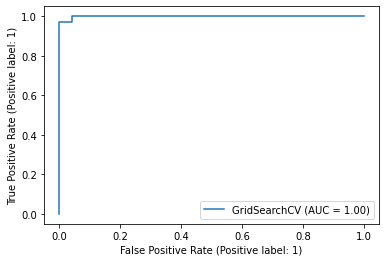

In [69]:
#plotting roc curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gbc_gscv, x_test, y_test);

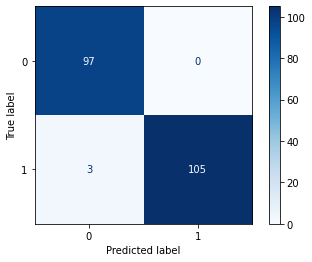

In [70]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbc_gscv, x_test, y_test,
                     cmap=plt.cm.Blues);

In [71]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        97
           1       1.00      0.97      0.99       108

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### If you find this notebook helpful, don't forget upvoting. Thank You